Item a: p(x) = 0.02014x^2 + 0.22472x + -0.45181


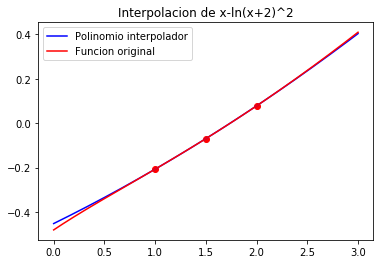

Item c: integral = -0.0677


In [8]:
# Ejercicio 2: Interpolacion polinomial
# f(x) = x - ln(2+x)**2
import numpy as np
import matplotlib.pyplot as plt

def f_ej2(x):
    return x - np.log(2+x)**2

nodes = [1, 1.5, 2]
f_nodes = [ f_ej2(node) for node in nodes]
ao = 6*f_ej2(1) - 8*f_ej2(1.5) + 3*f_ej2(2)
a1 = -7*f_ej2(1) + 12*f_ej2(1.5) - 5*f_ej2(2)
a2 = 2*f_ej2(1) - 4*f_ej2(1.5) + 2*f_ej2(2)
print(f'Item a: p(x) = {np.round(a2,5)}x^2 + {np.round(a1,5)}x + {np.round(ao,5)}')
x = np.linspace(0, 3, 1000)
pol = a2*x**2 + a1*x + ao
real = f_ej2(x)
plt.figure()
plt.plot(x, pol, label='Polinomio interpolador', color='b')
plt.plot(x, real, label='Funcion original', color='r')
plt.scatter(nodes, f_nodes, color='r')
plt.title('Interpolacion de x-ln(x+2)^2')
plt.legend()
plt.show()
print(f'Item c: integral = {np.round(7/3.0*np.round(a2,5)+3/2.0*np.round(a1,5)+np.round(ao,5), 4)}')

In [9]:
# Ejercicio 3: EDO Heun
# y' = sen(y) + t^2

from ode_methods import heun, print_result, richardson, wanted_step

def funcion_carga(tn, yn):
    return np.sin(yn) + tn**2

yo = 1
to = 0
n = 3
hb = 0.1
yb = heun(to, hb, n, funcion_carga, yo)
print_result('Heun', n, yb[1:], None)

n = 2
hc1 = 0.5
yc1 = heun(to, hc1, n, funcion_carga, yo)
print_result('Heun', n, yc1[1:], None)

n = 4
hc2 = 0.25
yc2 = heun(to, hc2, n, funcion_carga, yo)
print_result('Heun', n, yc2[1:], None)


c = richardson(yc1[-1][0], hc1, yc2[-1][0], hc2, 2)
print(f'C = {c}')
error = 1e-5
print(f'Item c: h <= {wanted_step(c,error,2)}')

Heun con 3 pasos
[[1.08676879]
 [1.17968435]
 [1.28025363]]
 
Heun con 2 pasos
[[1.52005824]
 [2.29222222]]
 
Heun con 4 pasos
[[1.22996459]
 [1.51133543]
 [1.85871034]
 [2.27199114]]
 
C = 0.10789914123546158
Item c: h <= 0.009627000755935925


In [19]:
# Ejercicio 4: Sistemas lineales iterativos Gauss-Seidel

# Calculan xi en la iteracion k, recibe el arreglo de los xk-1 y de los xk
# Cada xi sabe si tiene que usar para cada variable el valor actual xk o el anterior xk-1

def x1(xk, xk_1):
    return (4 - 2*xk_1[1] + 3*xk_1[2])/5 
    
def x2(xk, xk_1):
    return (4 - xk[0] - 2*xk_1[2])/(-5)
    
def x3(xk, xk_1):
    return (4 - xk[0] + xk[1])/3

# xi: Arreglo de callbacks que reciben la iteracion actual y la anterior y devuelven el valor de las variables
def gauss_seidel(xi, xo, n):
    x = np.zeros((n, len(xo)))
    x[0] = xo
    for k in range(n):
        for j in range(len(xo)):
            x[k][j] = xi[j](x[k], x[k-1])
    
    return x

xo = [0, 0, 0]
callbacks = [x1, x2, x3]
n = 2
x = gauss_seidel(callbacks, xo, 2)
print(x)

[[ 0.8        -0.64        0.85333333]
 [ 1.568      -0.14506667  0.76231111]]


In [23]:
# Ejercicio 5: Cuadrados minimos

A = np.asarray([[4, -2, 1], [1, -1, 1], [0, 0, 1], [1, 1, 1]])
b = [3, 1, 1, 3]

x = np.linalg.solve(A.T @ A, A.T @ b)
print(x)

[1. 1. 1.]
